In [369]:
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\khush\.cache\kagglehub\datasets\mohammadtalib786\retail-sales-dataset\versions\1


In [370]:
sales = pd.read_csv("./retail-sales-dataset/versions/1/retail_sales_dataset.csv")
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [371]:
sales.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [372]:
sales.duplicated().sum()

np.int64(0)

In [373]:
sales['Date'].dtype
sales['Date']= pd.to_datetime(sales['Date'])
sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[us]
 2   Customer ID       1000 non-null   str           
 3   Gender            1000 non-null   str           
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   str           
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[us](1), int64(5), str(3)
memory usage: 70.4 KB


In [374]:
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [375]:
sales['Price per Unit'] = sales['Price per Unit'].astype('float64')
sales['Total Amount'] = sales['Total Amount'].astype('float64')
sales.info()


<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[us]
 2   Customer ID       1000 non-null   str           
 3   Gender            1000 non-null   str           
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   str           
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   float64       
 8   Total Amount      1000 non-null   float64       
dtypes: datetime64[us](1), float64(2), int64(3), str(3)
memory usage: 70.4 KB


In [376]:
sales.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [377]:
sales.duplicated().sum()

np.int64(0)

In [378]:
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023,5


In [379]:
daily_sell = sales.groupby('Date')['Total Amount'].sum()

<Axes: title={'center': 'Daily sell Chart'}, xlabel='Date', ylabel='Amount'>

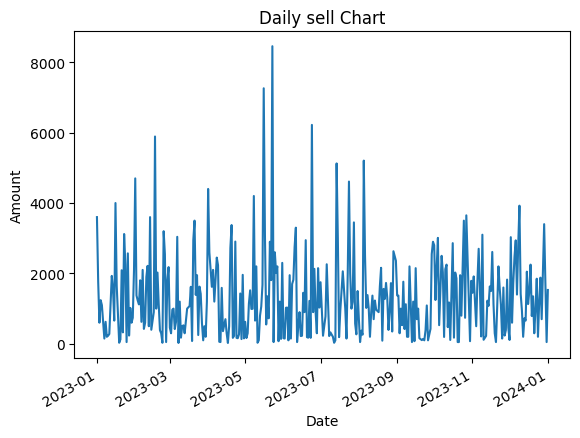

In [380]:

daily_sell = sales.groupby('Date')['Total Amount'].sum()
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Daily sell Chart")
daily_sell.plot()

#plt.show()

<Axes: title={'center': 'Product Category Chart'}, xlabel='Product Category', ylabel='Amount'>

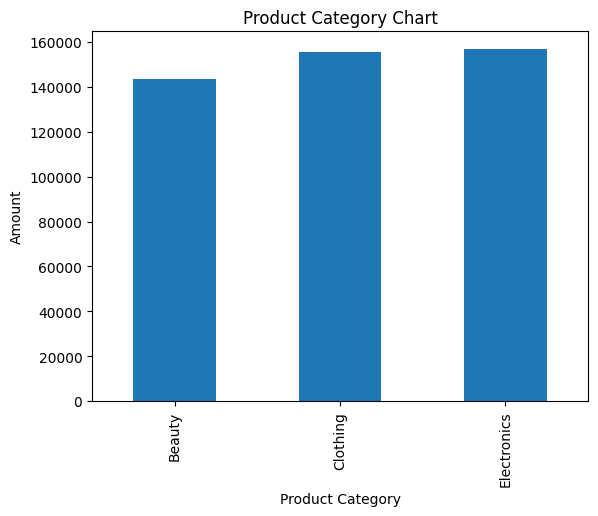

In [381]:
Categories = sales.groupby('Product Category')['Total Amount'].sum()
plt.xlabel("Catagories")
plt.ylabel("Amount")
plt.title("Product Category Chart")
Categories.plot(kind='bar')
#plt.show()

<Axes: title={'center': 'revenue distribution'}, ylabel='Frequency'>

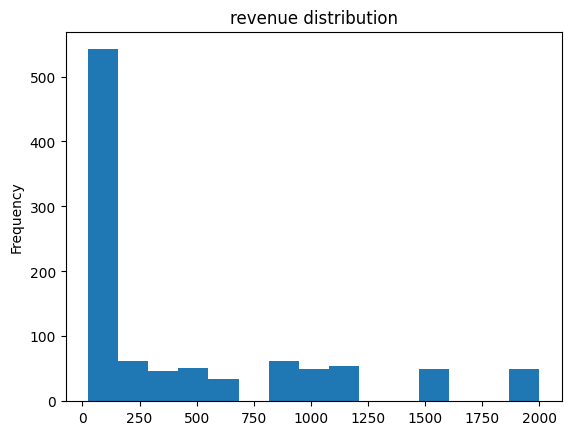

In [382]:
plt.title("revenue distribution")
sales['Total Amount'].plot(kind='hist',bins = 15)

<Axes: xlabel='Gender'>

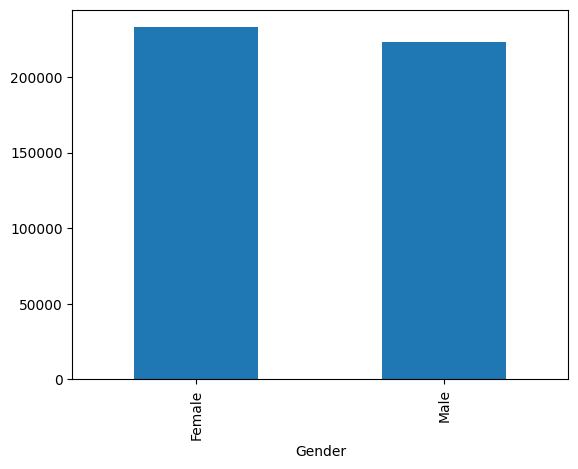

In [383]:
gender_wise = sales.groupby('Gender')['Total Amount'].sum()
gender_wise.plot(kind="bar")

<Axes: xlabel='Age'>

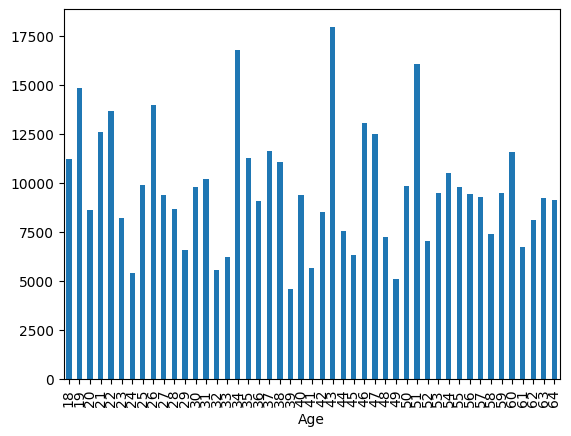

In [384]:
age = sales.groupby('Age')['Total Amount'].sum()
age.plot(kind="bar")


<Axes: ylabel='Frequency'>

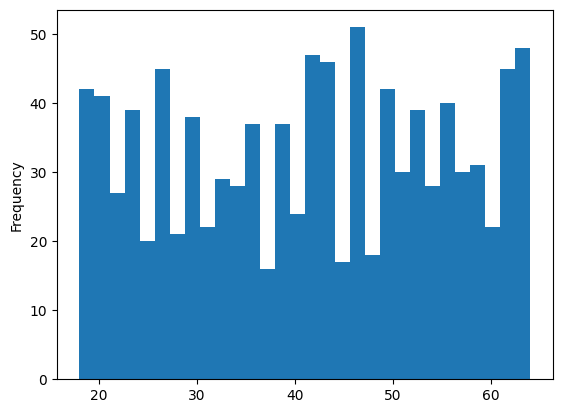

In [385]:
sales['Age'].plot(kind="hist",bins= 30)

In [386]:
total = sales['Total Amount'].sum()
print(f"Total of Total Amount  : {total}")

Total of Total Amount  : 456000.0


In [387]:
Total_Product = sales['Product Category'].unique()
print(f"Total Product Category : ",end="")
for product in Total_Product:
        print(f"{product} ",end=" ")

Total Product Category : Beauty  Clothing  Electronics  

In [388]:

total_Quantity = sales.groupby('Product Category')['Quantity'].sum()
print(f"Over all Quantity Sells is : \n{total_Quantity}")


Over all Quantity Sells is : 
Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


In [389]:
total_item_sold = sales['Quantity'].sum()
print(f"Over all Total item Sold : {total_item_sold}")

Over all Total item Sold : 2514


In [390]:

average_age = sales['Age'].mean()
print(f"Average Age of customers : {int(average_age)}")

Average Age of customers : 41


In [391]:
minimum_age = sales['Age'].min()
maximum_age = sales['Age'].max()
print(f"Minimum Age of Customer : {minimum_age}\nMaximum Age of customer : {maximum_age}")

Minimum Age of Customer : 18
Maximum Age of customer : 64


In [392]:
large_customer_age = sales['Age'].value_counts()
print(f"large customer that come Age : {large_customer_age.idxmax()} : {large_customer_age.max()} customer")
print(f"little customer that come Age : {large_customer_age.idxmin()} : {large_customer_age.min()} customer")


large customer that come Age : 64 : 31 customer
little customer that come Age : 33 : 10 customer


In [393]:
sales.head()
count_male = (sales['Gender'] == 'Male').value_counts()
count_male
count_female = (sales['Gender'] == 'Female').value_counts()
count_female

for Cm in count_male.keys():
    if Cm:
        print(f"Male count : {count_male[Cm]}")
for Cf in count_female.keys():
    if Cf:
        print(f"Female count : {count_female[Cf]}")

Male count : 490
Female count : 510


In [394]:
mean_of_Total_Amount = sales['Total Amount'].mean()
print(f"Mean of Total Amount : {mean_of_Total_Amount}")

Mean of Total Amount : 456.0


In [395]:
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023,5


In [396]:
sales.sort_values('Age')
sales.sort_values('Age',ascending=False)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
13,14,2023-01-17,CUST014,Male,64,Clothing,4,30.0,120.0,2023,1
24,25,2023-12-26,CUST025,Female,64,Beauty,1,50.0,50.0,2023,12
472,473,2023-02-25,CUST473,Male,64,Beauty,1,50.0,50.0,2023,2
398,399,2023-03-01,CUST399,Female,64,Beauty,2,30.0,60.0,2023,3
375,376,2023-05-16,CUST376,Female,64,Beauty,1,30.0,30.0,2023,5
...,...,...,...,...,...,...,...,...,...,...,...
304,305,2023-05-16,CUST305,Female,18,Beauty,1,30.0,30.0,2023,5
73,74,2023-11-22,CUST074,Female,18,Beauty,4,500.0,2000.0,2023,11
57,58,2023-11-13,CUST058,Male,18,Clothing,4,300.0,1200.0,2023,11
61,62,2023-12-27,CUST062,Male,18,Beauty,2,50.0,100.0,2023,12


In [397]:
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023,5


In [402]:
#sales = sales.pivot(index='Transaction ID',columns='Product Category')
sales = sales.pivot(index='Transaction ID',columns='Gender')

sales.head()

Date            Customer ID             Age        \
Gender             Female       Male      Female     Male Female  Male   
Transaction ID                                                           
1                     NaT 2023-11-24         NaN  CUST001    NaN  34.0   
2              2023-02-27        NaT     CUST002      NaN   26.0   NaN   
3                     NaT 2023-01-13         NaN  CUST003    NaN  50.0   
4                     NaT 2023-05-21         NaN  CUST004    NaN  37.0   
5                     NaT 2023-05-06         NaN  CUST005    NaN  30.0   

               Product Category              Quantity      Price per Unit  \
Gender                   Female         Male   Female Male         Female   
Transaction ID                                                              
1                           NaN       Beauty      NaN  3.0            NaN   
2                      Clothing          NaN      2.0  NaN          500.0   
3                           NaN  Electronics      NaN  1.0            NaN   
4                           NaN     Clothing      NaN  1.0            NaN   
5                           NaN       Beauty      NaN  2.0            NaN   

                      Total Amount           Year          Month        
Gender           Male       Female   Male  Female    Male Female  Male  
Transaction ID                                                          
1                50.0          NaN  150.0     NaN  2023.0    NaN  11.0  
2                 NaN       1000.0    NaN  2023.0     NaN    2.0   NaN  
3                30.0          NaN   30.0     NaN  2023.0    NaN   1.0  
4               500.0          NaN  500.0     NaN  2023.0    NaN   5.0  
5                50.0          NaN  100.0     NaN  2023.0    NaN   5.0

In [403]:
sales.isnull().sum()

                  Gender
Date              Female    490
                  Male      510
Customer ID       Female    490
                  Male      510
Age               Female    490
                  Male      510
Product Category  Female    490
                  Male      510
Quantity          Female    490
                  Male      510
Price per Unit    Female    490
                  Male      510
Total Amount      Female    490
                  Male      510
Year              Female    490
                  Male      510
Month             Female    490
                  Male      510
dtype: int64

In [404]:
sales.notnull()

Date        Customer ID           Age         \
Gender         Female   Male      Female   Male Female   Male   
Transaction ID                                                  
1               False   True       False   True  False   True   
2                True  False        True  False   True  False   
3               False   True       False   True  False   True   
4               False   True       False   True  False   True   
5               False   True       False   True  False   True   
...               ...    ...         ...    ...    ...    ...   
996             False   True       False   True  False   True   
997             False   True       False   True  False   True   
998              True  False        True  False   True  False   
999              True  False        True  False   True  False   
1000            False   True       False   True  False   True   

               Product Category        Quantity        Price per Unit         \
Gender                   Female   Male   Female   Male         Female   Male   
Transaction ID                                                                 
1                         False   True    False   True          False   True   
2                          True  False     True  False           True  False   
3                         False   True    False   True          False   True   
4                         False   True    False   True          False   True   
5                         False   True    False   True          False   True   
...                         ...    ...      ...    ...            ...    ...   
996                       False   True    False   True          False   True   
997                       False   True    False   True          False   True   
998                        True  False     True  False           True  False   
999                        True  False     True  False           True  False   
1000                      False   True    False   True          False   True   

               Total Amount          Year         Month         
Gender               Female   Male Female   Male Female   Male  
Transaction ID                                                  
1                     False   True  False   True  False   True  
2                      True  False   True  False   True  False  
3                     False   True  False   True  False   True  
4                     False   True  False   True  False   True  
5                     False   True  False   True  False   True  
...                     ...    ...    ...    ...    ...    ...  
996                   False   True  False   True  False   True  
997                   False   True  False   True  False   True  
998                    True  False   True  False   True  False  
999                    True  False   True  False   True  False  
1000                  False   True  False   True  False   True  

[1000 rows x 18 columns]

In [406]:
#sales.fillna(" ")
sales.fillna("-")

Date                      Customer ID  \
Gender                       Female                 Male      Female   
Transaction ID                                                         
1                                 -  2023-11-24 00:00:00           -   
2               2023-02-27 00:00:00                    -     CUST002   
3                                 -  2023-01-13 00:00:00           -   
4                                 -  2023-05-21 00:00:00           -   
5                                 -  2023-05-06 00:00:00           -   
...                             ...                  ...         ...   
996                               -  2023-05-16 00:00:00           -   
997                               -  2023-11-17 00:00:00           -   
998             2023-10-29 00:00:00                    -     CUST998   
999             2023-12-05 00:00:00                    -     CUST999   
1000                              -  2023-04-12 00:00:00           -   

                            Age       Product Category              Quantity  \
Gender              Male Female  Male           Female         Male   Female   
Transaction ID                                                                 
1                CUST001      -  34.0                -       Beauty        -   
2                      -   26.0     -         Clothing            -      2.0   
3                CUST003      -  50.0                -  Electronics        -   
4                CUST004      -  37.0                -     Clothing        -   
5                CUST005      -  30.0                -       Beauty        -   
...                  ...    ...   ...              ...          ...      ...   
996              CUST996      -  62.0                -     Clothing        -   
997              CUST997      -  52.0                -       Beauty        -   
998                    -   23.0     -           Beauty            -      4.0   
999                    -   36.0     -      Electronics            -      3.0   
1000            CUST1000      -  47.0                -  Electronics        -   

                    Price per Unit        Total Amount           Year          \
Gender         Male         Female   Male       Female   Male  Female    Male   
Transaction ID                                                                  
1               3.0              -   50.0            -  150.0       -  2023.0   
2                 -          500.0      -       1000.0      -  2023.0       -   
3               1.0              -   30.0            -   30.0       -  2023.0   
4               1.0              -  500.0            -  500.0       -  2023.0   
5               2.0              -   50.0            -  100.0       -  2023.0   
...             ...            ...    ...          ...    ...     ...     ...   
996             1.0              -   50.0            -   50.0       -  2023.0   
997             3.0              -   30.0            -   90.0       -  2023.0   
998               -           25.0      -        100.0      -  2023.0       -   
999               -           50.0      -        150.0      -  2023.0       -   
1000            4.0              -   30.0            -  120.0       -  2023.0   

                Month        
Gender         Female  Male  
Transaction ID               
1                   -  11.0  
2                 2.0     -  
3                   -   1.0  
4                   -   5.0  
5                   -   5.0  
...               ...   ...  
996                 -   5.0  
997                 -  11.0  
998              10.0     -  
999              12.0     -  
1000                -   4.0  

[1000 rows x 18 columns]